In [2]:
#팬시
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
ind = [3,7,4]

In [3]:
x[ind]

array([71, 86, 60])

In [4]:
ind = np.array([[3,7],
                [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [7]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [9]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
X[2,[2,0,1]]

array([10,  8,  9])

In [11]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [12]:
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean,cov,100)
X.shape

(100, 2)

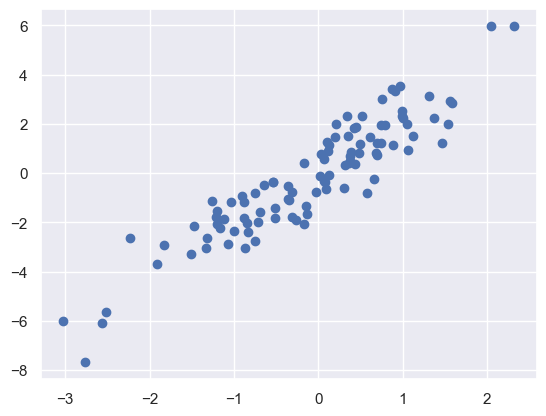

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0],X[:,1])

In [14]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([49, 25, 53,  4, 32,  9,  8, 55, 84, 63, 41,  7, 39, 62, 70, 59, 20,
       73, 17, 47])

In [15]:
selection = X[indices]
selection.shape

(20, 2)

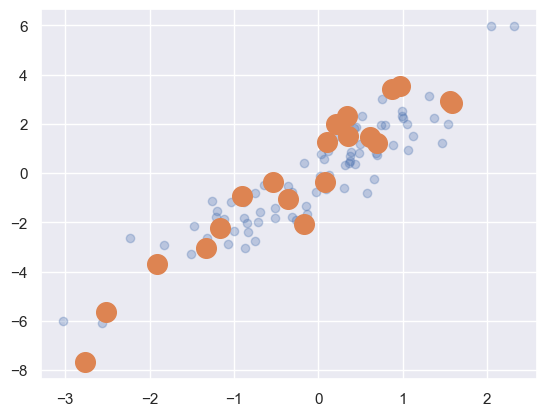

In [17]:
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(selection[:,0], selection[:,1], s=200)

In [18]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [19]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [20]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
i = [2,3,3,4,4,4]
x[i]+=1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [23]:
x = np.zeros(10)
np.add.at(x,i,1) #x에 i인덱스 1 더하기
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [24]:
np.random.seed(42)
x = np.random.randn(100)
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins,x)
np.add.at(counts, i, 1)

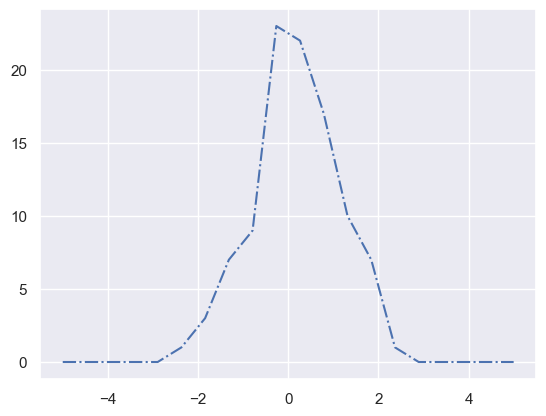

In [41]:
plt.plot(bins, counts, linestyle = '-.')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x12d4d7f4100>])

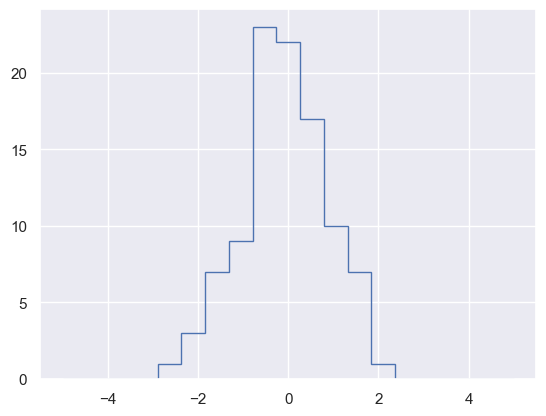

In [40]:
plt.hist(x,bins,histtype='step')

In [42]:
print('NumPy routine:')
%timeit counts, edges = np.histogram(x,bins)
print('Custom routine')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
17.7 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Custom routine
13.4 µs ± 52.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [43]:
x = np.random.randn(1000000)
print('NumPy routine:')
%timeit counts, edges = np.histogram(x, bins)

print('Custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
57 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
105 ms ± 422 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
L = [3,1,4,1,5,9,2,6]
sorted(L)

[1, 1, 2, 3, 4, 5, 6, 9]

In [45]:
L.sort()
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [4]:
x = np.array([2,1,4,3,5])
np.sort(x) # x가 바뀌는 것 아님

ValueError: Cannot specify order when the array has no fields.

In [47]:
x.sort()
print(x)

[1 2 3 4 5]


In [48]:
x = np.array([2,1,4,3,5])
i = np.argsort(x) #작은 값을 갖는 순서대로 인덱스 번호 저장
print(i)

[1 0 3 2 4]


In [49]:
x[i] #[1 0 3 2 4] 순서대로 커짐

array([1, 2, 3, 4, 5])

In [50]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [51]:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [52]:
np.sort(X,axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [53]:
x = np.array([7,2,3,1,6,5,4]) 
np.partition(x,3) #제일 작은 3개 선택 뒤는 나머지 순서는 랜덤

array([2, 1, 3, 4, 6, 5, 7])

In [56]:
np.partition(X,2,axis=1) #마찬가지로 행 기준 제일 작은 2개 선택 뒤는 나머지 순서는 랜덤

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [55]:
np.partition(X,2,axis=0) #열 기준에서는 세로방향으로 제일 작은거 두개 랜덤 순서

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [59]:
X = rand.rand(10,2)

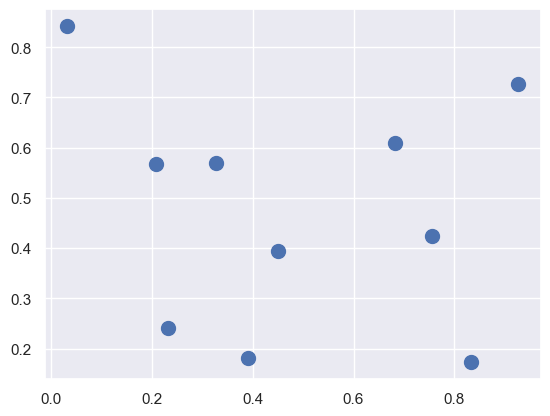

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100)

In [61]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:])**2,axis=-1)

In [64]:
X[:,np.newaxis, :]

array([[[0.23089383, 0.24102547]],

       [[0.68326352, 0.60999666]],

       [[0.83319491, 0.17336465]],

       [[0.39106061, 0.18223609]],

       [[0.75536141, 0.42515587]],

       [[0.20794166, 0.56770033]],

       [[0.03131329, 0.84228477]],

       [[0.44975413, 0.39515024]],

       [[0.92665887, 0.727272  ]],

       [[0.32654077, 0.57044397]]])

In [65]:
X[np.newaxis, :, :]

array([[[0.23089383, 0.24102547],
        [0.68326352, 0.60999666],
        [0.83319491, 0.17336465],
        [0.39106061, 0.18223609],
        [0.75536141, 0.42515587],
        [0.20794166, 0.56770033],
        [0.03131329, 0.84228477],
        [0.44975413, 0.39515024],
        [0.92665887, 0.727272  ],
        [0.32654077, 0.57044397]]])

In [62]:
differences = X[:,np.newaxis, :] - X[np.newaxis, :, :] #브로드캐스팅을 이용해 각 점에서 다른 점 과의 좌표 차이를 구함
differences.shape

(10, 10, 2)

In [66]:
differences

array([[[ 0.        ,  0.        ],
        [-0.45236969, -0.36897119],
        [-0.60230109,  0.06766081],
        [-0.16016678,  0.05878938],
        [-0.52446758, -0.18413041],
        [ 0.02295216, -0.32667486],
        [ 0.19958053, -0.60125931],
        [-0.21886031, -0.15412477],
        [-0.69576504, -0.48624653],
        [-0.09564694, -0.32941851]],

       [[ 0.45236969,  0.36897119],
        [ 0.        ,  0.        ],
        [-0.14993139,  0.436632  ],
        [ 0.29220291,  0.42776057],
        [-0.07209789,  0.18484078],
        [ 0.47532186,  0.04229633],
        [ 0.65195023, -0.23228812],
        [ 0.23350939,  0.21484642],
        [-0.24339535, -0.11727534],
        [ 0.35672275,  0.03955268]],

       [[ 0.60230109, -0.06766081],
        [ 0.14993139, -0.436632  ],
        [ 0.        ,  0.        ],
        [ 0.4421343 , -0.00887143],
        [ 0.0778335 , -0.25179122],
        [ 0.62525325, -0.39433567],
        [ 0.80188162, -0.66892012],
        [ 0.38344078, -0

In [63]:
#차이 제곱
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [67]:
#x좌표 변화량 + y좌표 변화량
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [68]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
nearest = np.argsort(dist_sq,axis=1)
print(nearest)

[[0 3 7 5 9 4 1 2 6 8]
 [1 4 8 7 9 2 5 3 0 6]
 [2 4 3 7 1 8 0 9 5 6]
 [3 0 7 9 5 4 2 1 6 8]
 [4 1 2 7 8 3 9 0 5 6]
 [5 9 7 6 0 3 1 4 8 2]
 [6 5 9 7 0 1 3 4 8 2]
 [7 9 3 0 5 4 1 2 8 6]
 [8 1 4 2 7 9 5 3 0 6]
 [9 5 7 0 1 3 6 4 8 2]]


In [71]:
K = 2
nearest_partition = np.argpartition(dist_sq,K+1,axis=1)

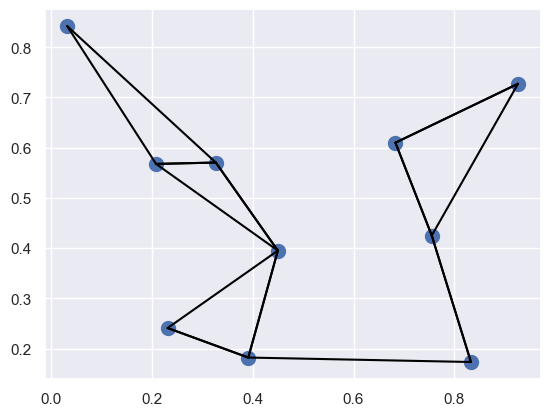

In [72]:
plt.scatter(X[:,0],X[:,1],s=100)
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

In [73]:
name = ['Alice', 'Bob', 'Cathy', "Doug"]
age = [25,45,37,19]
weight = [55.0, 85.5, 68.0, 61.5]

In [74]:
x = np.zeros(4,dtype=int)

In [77]:
data = np.zeros(4,dtype={'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [79]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [80]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [81]:
data[0]

('Alice', 25, 55.)

In [82]:
data[-1]['name']

'Doug'

In [83]:
data[data['age']<30]['name']

array(['Alice', 'Doug'], dtype='<U10')

In [87]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8',(3,3))])

In [91]:
X = np.zeros(1,dtype=tp)
print(x[0])
print(X['mat'][0])

0
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [92]:
data['age']

array([25, 45, 37, 19])

In [93]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

In [94]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

116 ns ± 0.657 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
1.42 µs ± 3.27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.3 µs ± 20.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
